# Ερωτηση 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt #main plotting tool for python
import matplotlib as mpl
import numpy as np
import scipy.stats as stats
import scipy as sp
import seaborn as sns


df = pd.read_csv('data.csv')
df_copy = df

Αρχικά, θέλουμε να δούμε αν πράγματι υπάρχει κάποια σχέση μεταξύ των Α με Β και Α με C. Δεν θέλουμε να δούμε αν έχουν κοντινές τιμές, αλλά θέλουμε να δούμε αν συμπεριφέρονται με σχετικά παρόμοιο τρόπο, δηλαδή αυξάνοντας την μια μεταβλητή θέλουμε να δούμε αν πράγματι θα αυξάνεται η άλλη(θετική συσχέτιση) ή το αντίθετο (αρνητική συσχέτιση) 

In [2]:
df.corr()

,A,B,C
A,1.000000,0.933620,0.886353
B,0.933620,1.000000,0.922622
C,0.886353,0.922622,1.000000


Με βάση τον πίνακα συσχετίσεων βλέπουμε ότι υπάρχει σχετικά ισχυρή συσχέτιση Α-Β και Α-C.
Επειδή τα δεδομένα μας, δεν ξέρουμε αν έχουν γραμμική σχέση και αν ακολουθούν την Gaussian κατανομή, θα χρησιμοποιήσουμε την μέθοδο Kendall-Tau για να δούμε αν πράγματι έχουν συσχέτιση

In [3]:
tb, pb = stats.kendalltau(df.A, df.B)
tc, pc = stats.kendalltau(df.A, df.C)

print(f"Kendal Tau correlation of A with B is: {tb} with p-value: {pb} \nKendal Tau correlation of A with C is: {tc} with p-value: {pc}")

Kendal Tau correlation of A with B is: 0.8997117117117117 with p-value: 0.0 
Kendal Tau correlation of A with C is: 0.9354234234234236 with p-value: 0.0


Και πάλι βλέπουμε ότι έχουν ισχυρές συσχετίσεις με πολύ χαμηλά p-values που δείχνει ότι οι συσχετίσεις μας είναι αρκετά απίθανο να βρέθηκαν τυχαία, ενδυναμώνοντας έτσι τον ισχυρισμό μας. 

Θα κάνουμε plot τις μεταβλητές Β, C προς την Α σε γραμμικό-γραμμικό χώρο για να δούμε αν μπορούμε να βγάλουμε κάποιο συμπέρασμα ως προς την συσχέτιση τους.

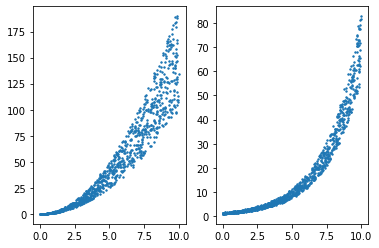

In [4]:
plt.subplot(121)
plt.scatter(df.A, df.B, label = 'B', s = 2)
x_label = "A"
plt.subplot(122)
plt.scatter(df.A, df.C, label = 'C', s = 2)



Μπορουμε να παρατηρησουμε οτι αυξανωτας τις τιμες του A, οι τιμες των B και C αυξανωται εκθετικα, το Β μεγαλυτερη ταχυτητα απο το C. Με βαση αυτην την παρατηρηση, θα κανουμε plot τις μεταβλητες B, C στον log-log χωρο και παρατηρωντας την συμπεριφορα των γραφικων θα προσπαθησουμε να βγαλουμε καλυτερα συμπερασματα.

[None]

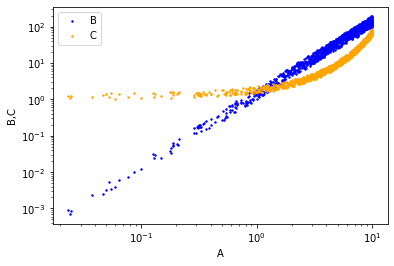

In [5]:

t = df.plot(kind='scatter', x = 'A', y = 'B', label = "B", color='Blue', s = 2)
df.plot(kind='scatter', x = 'A', y = 'C', label = "C", color='Orange', s = 2, ax = t)
t.set_ylabel('B,C')
t.set(xscale="log")
t.set(yscale="log")

Η γραμμική σχέση σε log-log χώρο σημαίνει πολυωνυμική σε γραμμικο-γραμμικο χώρο. Η κλίση στο log-log χώρο είναι ο εκθέτης του πολυωνύμου.
Στην περίπτωση μας, βλέπουμε ότι στο χώρο log log, η Β έχει γραμμική σχέση με την Α. Αυτό σημαίνει ότι θα ακολουθεί μια πολυωνυμική κατανομή  στην γραμμικη-γραμμικη σχέση. Η κλίση υποδηλώνει τον εκθέτη του πολυωνύμου
${f_B(x_A) = x_B^{a}}$

Η εκθετική σχέση παραμένει εκθετική στον log-log χώρο.
Άρα, μπορούμε να πούμε ότι η C ακολουθεί μια εκθετική κατανομή στον γραμμικο-γραμμικο χώρο ${f_C(x) = a^x}$

[None]

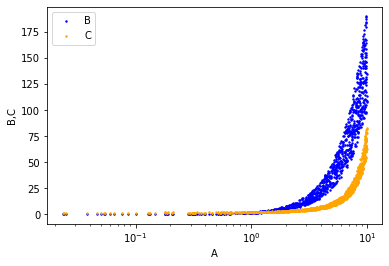

In [6]:
t = df.plot(kind='scatter', x = 'A', y = 'B', label = "B", color='Blue', s = 2)
df.plot(kind='scatter', x = 'A', y = 'C', label = "C", color='Orange', s = 2, ax = t)
t.set_ylabel('B,C')
t.set(xscale="log")
# t.set(yscale="log")

[None]

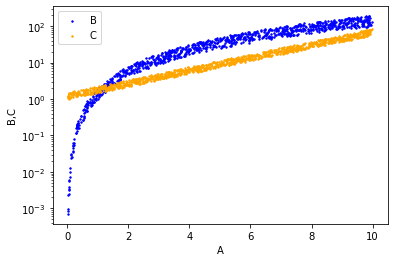

In [7]:
t = df.plot(kind='scatter', x = 'A', y = 'B', label = "B", color='Blue', s = 2)
df.plot(kind='scatter', x = 'A', y = 'C', label = "C", color='Orange', s = 2, ax = t)
t.set_ylabel('B,C')
# t.set(xscale="log")
t.set(yscale="log")

Οι παρατηρήσεις στο γραμμικό-log και log-γραμμικό χώρο επαληθεύουν τα προηγούμενα συμπεράσματα μας.